In [9]:
# 本交易策略的原因在于：
#   1. 观察到自己在做期权交易的时候，卖出期权基本都能赚钱，而买入期权基本都不赚钱，分析原因是基本交易的都是虚值期权，期权卖出的价格足够低所以保证了赚钱的高概率，也就是买入低价是赚钱最核心的一个因素
#   2. 聊到 zhongyi 的交易策略，他是买入自己了解的基本面靠谱的公司，如 JD, coinbase 等，在价格暴跌的时候买入，大概率反弹，核心是基本面，另外是低价
#   3. 回测了压力支撑位策略，方案主要原理是在相对价格低点时买入，相对价格高点时卖出，但过去震荡区间不代表未来区间，发现一段时间的较低点和较高点时进行交易，看一段时间与价格高低点的选取

from data_parser import price_data_parser

eth_price_data = price_data_parser.parse_yahoo_data("../data/eth_usd_20230710.csv", "2022-06-01")
print(len(eth_price_data))

405


In [10]:
eth_price_data[0]

{'datetime': '2022-06-01', 'price': 1942.050659}

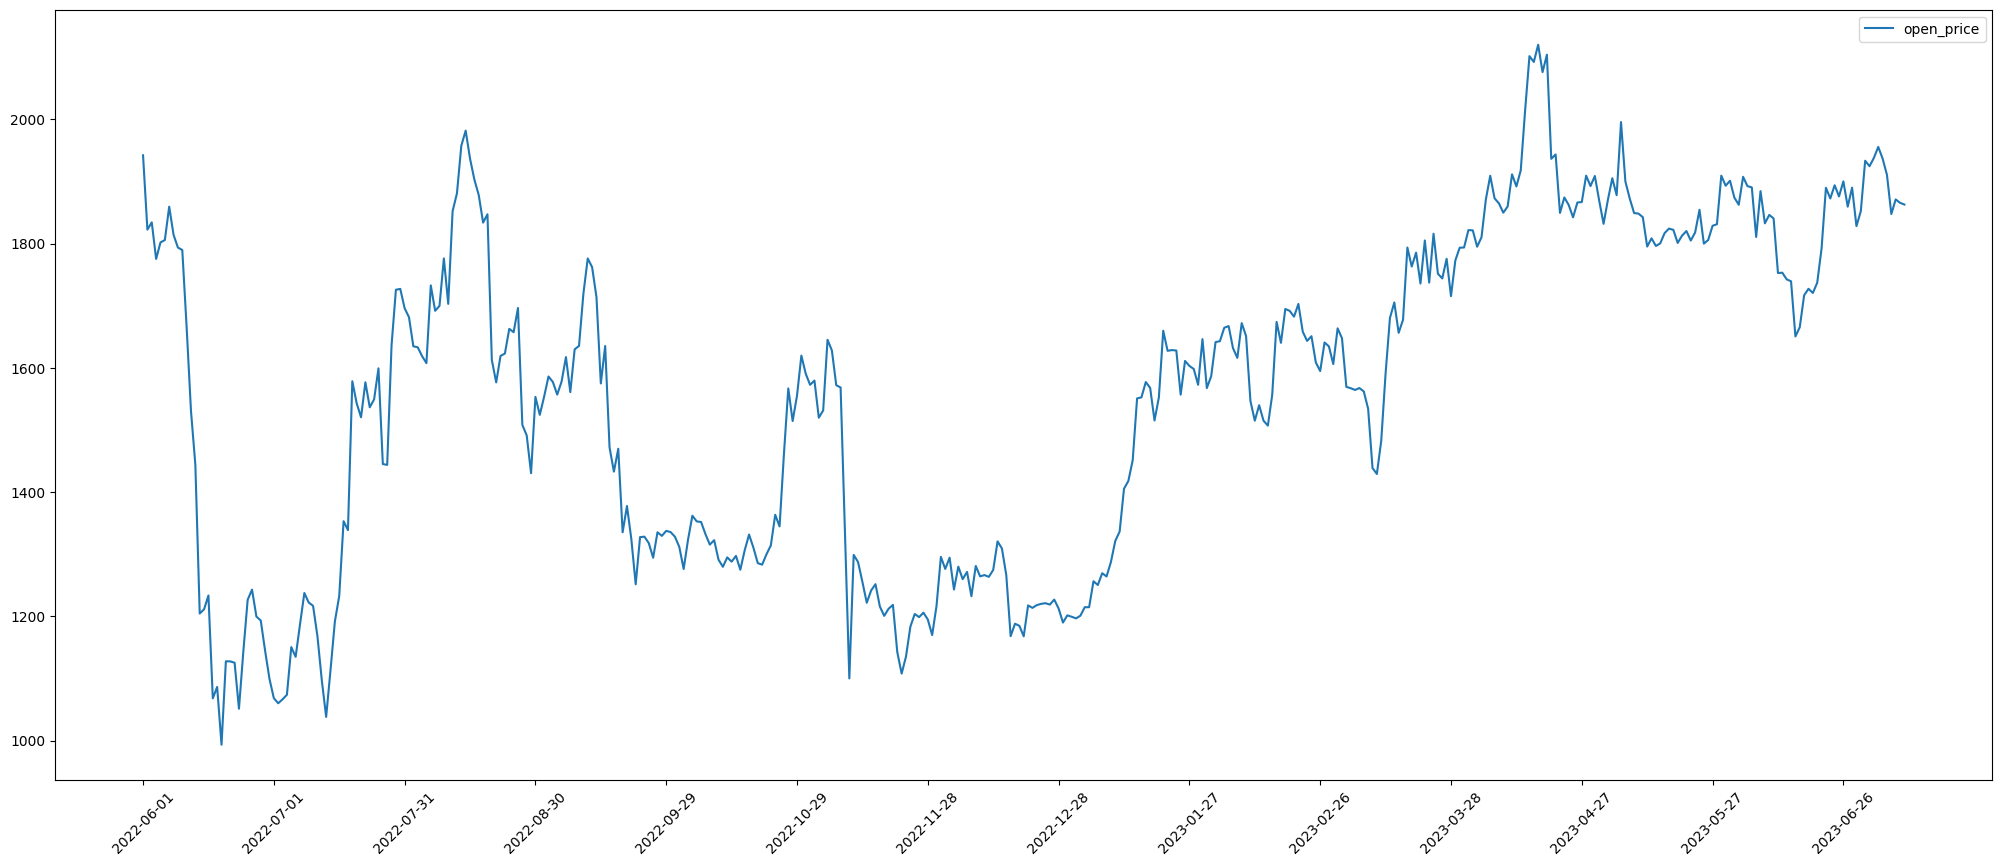

In [12]:
import matplotlib.pyplot as plt
import pandas as pd


def get_plot(plt_df):
    plt.figure(figsize=(25, 10))
    plt.plot(plt_df["datetime"], plt_df["price"], label="open_price")
    plt.xticks(plt_df["datetime"][::30], rotation=45)
    plt.legend()
    return plt


df = pd.DataFrame(eth_price_data)
plot = get_plot(df)
plot.show()

In [13]:
import datetime

PERIOD = 30

def get_period_high_low(current_day, days_before=PERIOD):
    period_high = 0
    period_low = 10**6

    # get day_before from current_day
    start_day = (datetime.datetime.strptime(current_day ,"%Y-%m-%d") - datetime.timedelta(days=days_before)).strftime("%Y-%m-%d")
    for d in eth_price_data:
        date_time = d["datetime"]
        price = d["price"]
        if date_time < start_day:
            continue
        if date_time >= current_day:
            break

        if price > period_high:
            period_high = price
        if price < period_low:
            period_low = price

    return period_high, period_low

In [16]:
def get_in_period(period=PERIOD):
    is_in_list = []
    not_in_date_list = []
    for d in eth_price_data[period:]:
        current_date = d["datetime"]
        price = d["price"]
        period_high, period_low = get_period_high_low(current_date, period)
        is_in = 0
        if period_low < price < period_high:
            is_in = 1
        else:
            not_in_date_list.append((current_date, price))
        is_in_list.append(is_in)
        # print("datetime:", current_date, "period high:", period_high, "period low:", period_low, "price:", price, "is_in:", is_in)

    print(len(is_in_list) - sum(is_in_list), len(is_in_list), (len(is_in_list) - sum(is_in_list))/len(is_in_list))
    return not_in_date_list

63 375 0.168


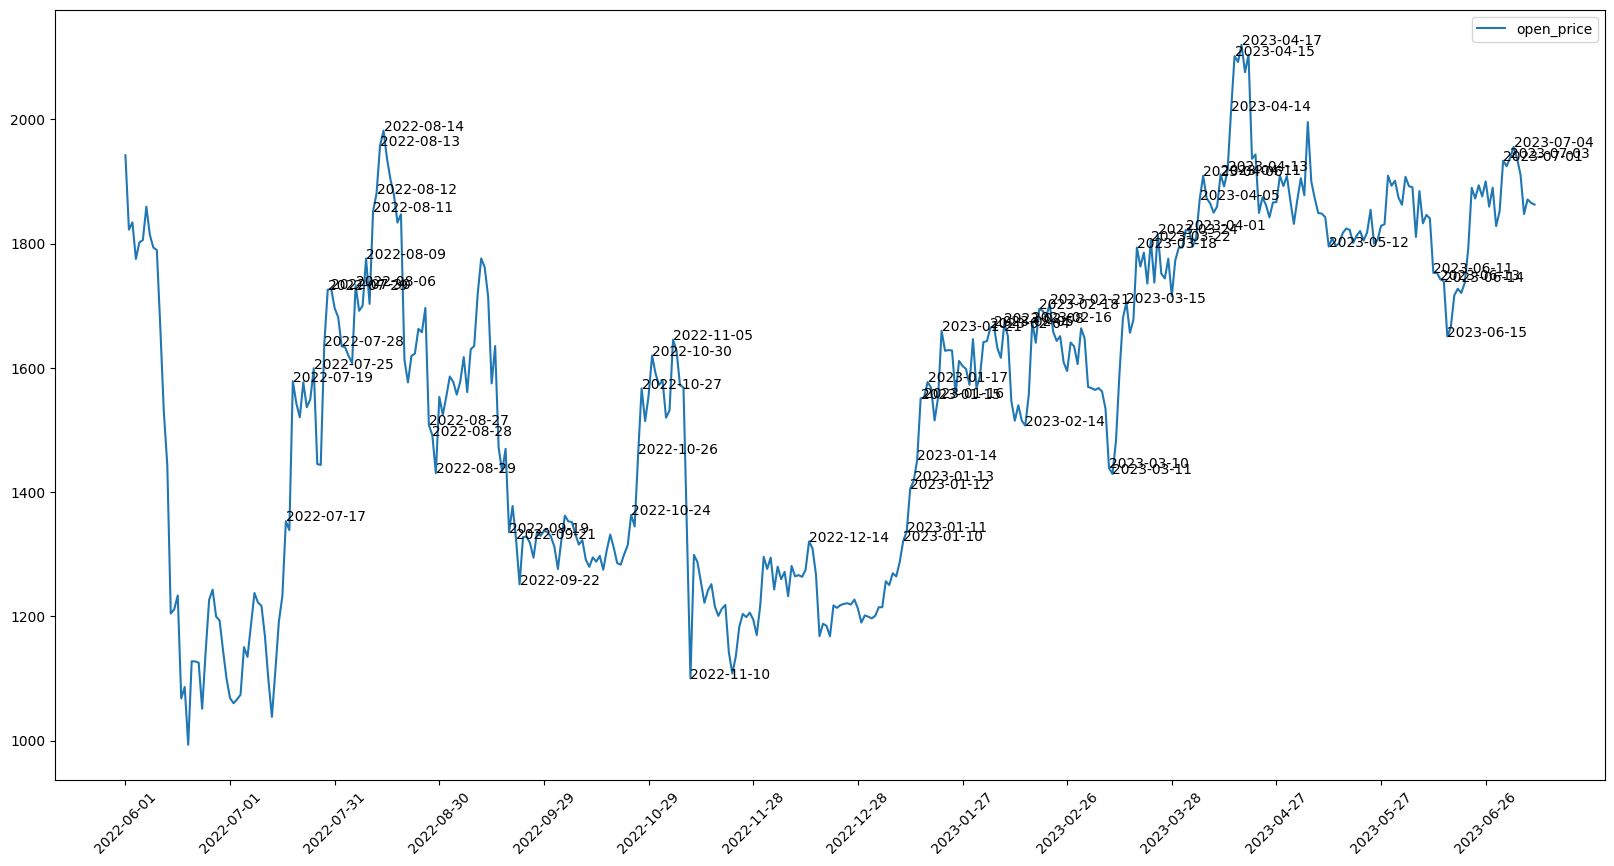

In [17]:
def get_annotate_plot(plt_df, not_in_list):
    plt.figure(figsize=(20, 10))
    plt.plot(plt_df["datetime"], plt_df["price"], label="open_price")
    plt.xticks(plt_df["datetime"][::30], rotation=45)
    for not_in_date, price in not_in_list:
        plt.annotate(not_in_date, (not_in_date, price))

    plt.legend()
    return plt


not_in_date_list = get_in_period(30)
plt = get_annotate_plot(df, not_in_date_list)
plt.show()

15 375 0.04


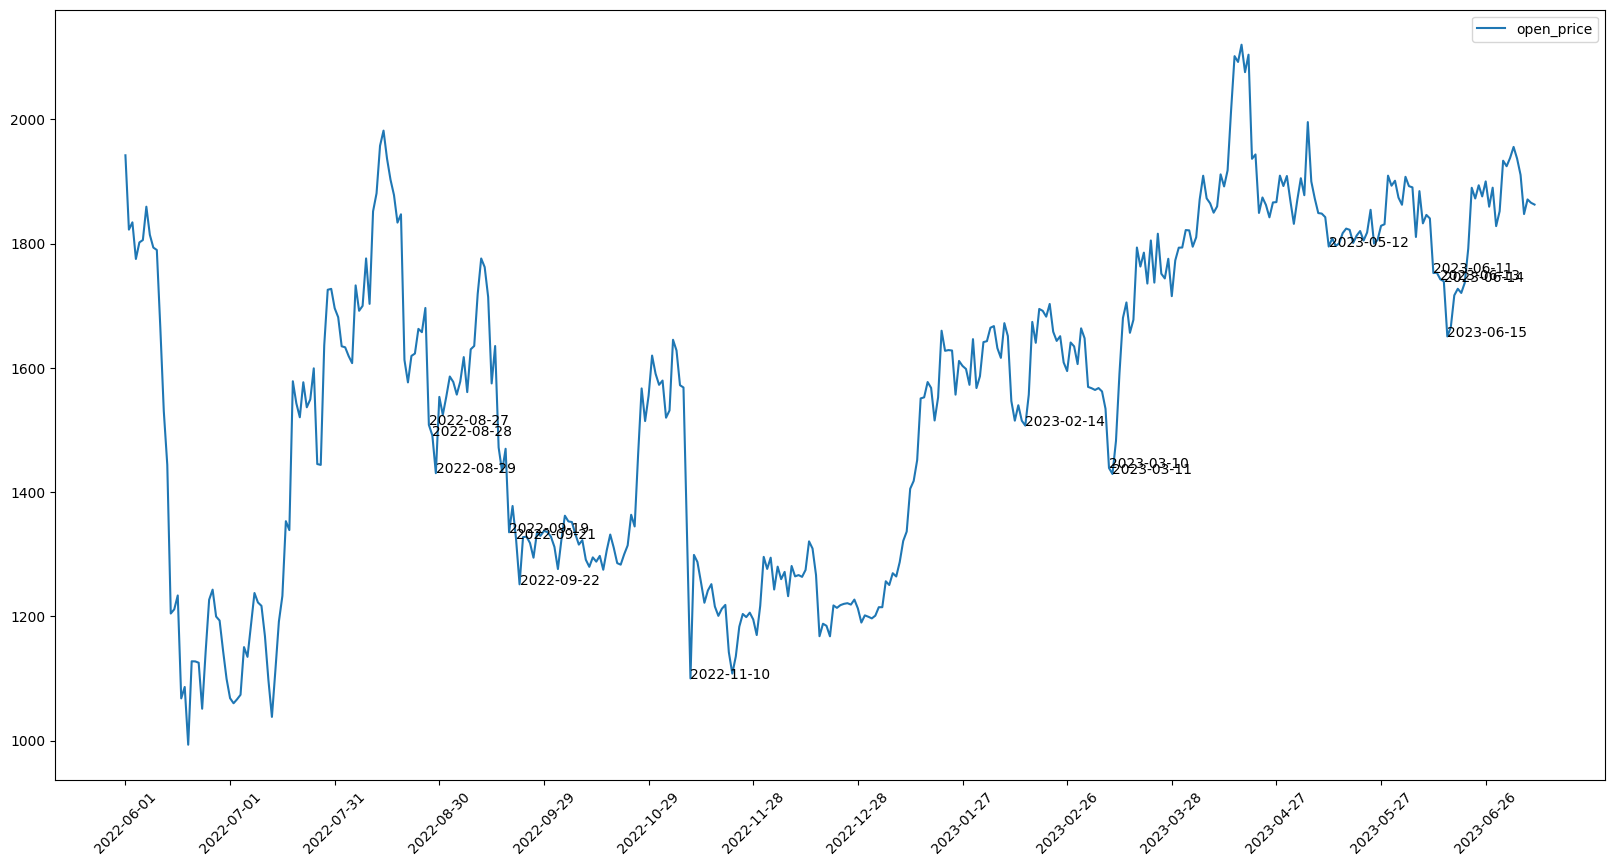

In [21]:
def get_in_period_lower(period=PERIOD):
    is_in_list = []
    not_in_date_list = []
    for d in eth_price_data[period:]:
        current_date = d["datetime"]
        price = d["price"]
        period_high, period_low = get_period_high_low(current_date, period)
        is_in = 0
        if price < period_low:
            is_in = 1
            not_in_date_list.append((current_date, price))
            # print("datetime:", current_date, "period high:", period_high, "period low:", period_low, "price:", price, "is_in:", is_in)
        is_in_list.append(is_in)

    print(sum(is_in_list), len(is_in_list), sum(is_in_list)/len(is_in_list))
    return not_in_date_list


not_in_date_lower_list = get_in_period_lower(30)
lower_plt = get_annotate_plot(df, not_in_date_lower_list)
lower_plt.show()

In [31]:
df[df["datetime"] >= "2023-02-14"].head(30)

,datetime,price
258,2023-02-14,1506.992065
259,2023-02-15,1556.765137
260,2023-02-16,1673.867432
261,2023-02-17,1640.280151
262,2023-02-18,1694.741821
263,2023-02-19,1691.680176
264,2023-02-20,1682.337036
265,2023-02-21,1702.797852
266,2023-02-22,1658.140991
267,2023-02-23,1643.298584


36 390 0.09230769230769231


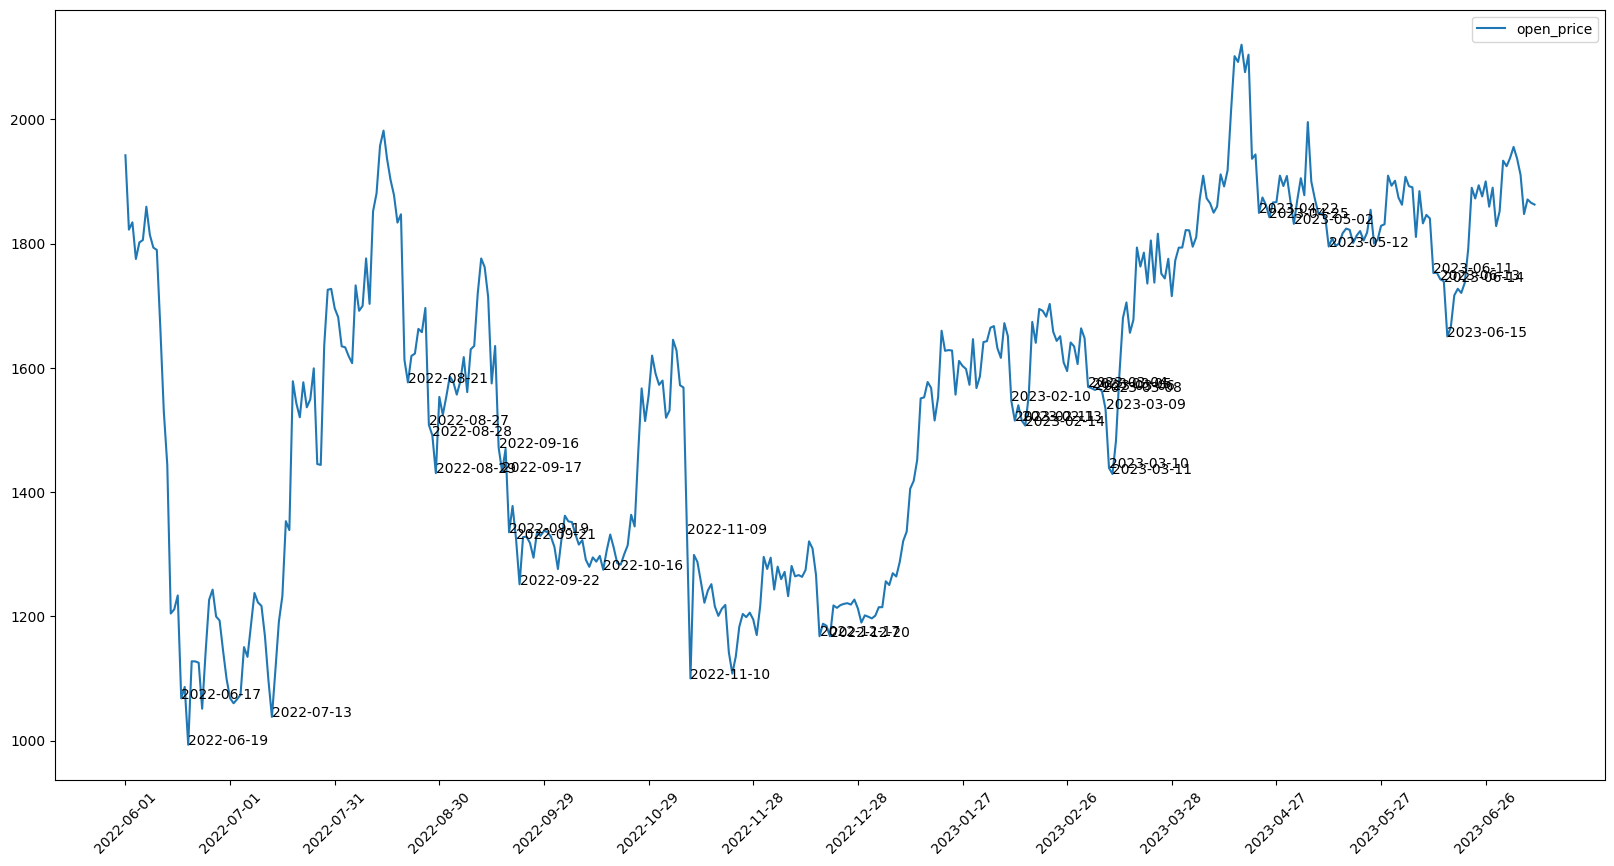

In [32]:
not_in_date_lower_list = get_in_period_lower(15)
lower_plt = get_annotate_plot(df, not_in_date_lower_list)
lower_plt.show()

datetime: 2022-07-13 period high: 1237.580322 period low: 1060.121216 price: 1038.186646 is_in: 1
datetime: 2022-08-21 period high: 1981.782471 period low: 1612.650635 price: 1576.543579 is_in: 1
datetime: 2022-08-27 period high: 1981.782471 period low: 1576.543579 price: 1508.156982 is_in: 1
datetime: 2022-08-28 period high: 1981.782471 period low: 1508.156982 price: 1491.206787 is_in: 1
datetime: 2022-08-29 period high: 1981.782471 period low: 1491.206787 price: 1430.439453 is_in: 1
datetime: 2022-09-16 period high: 1775.976074 period low: 1553.756348 price: 1471.928345 is_in: 1
datetime: 2022-09-17 period high: 1775.976074 period low: 1471.928345 price: 1432.876465 is_in: 1
datetime: 2022-09-19 period high: 1775.976074 period low: 1432.876465 price: 1335.270752 is_in: 1
datetime: 2022-09-21 period high: 1775.976074 period low: 1335.270752 price: 1324.215576 is_in: 1
datetime: 2022-09-22 period high: 1775.976074 period low: 1324.215576 price: 1251.567383 is_in: 1
datetime: 2022-10-16

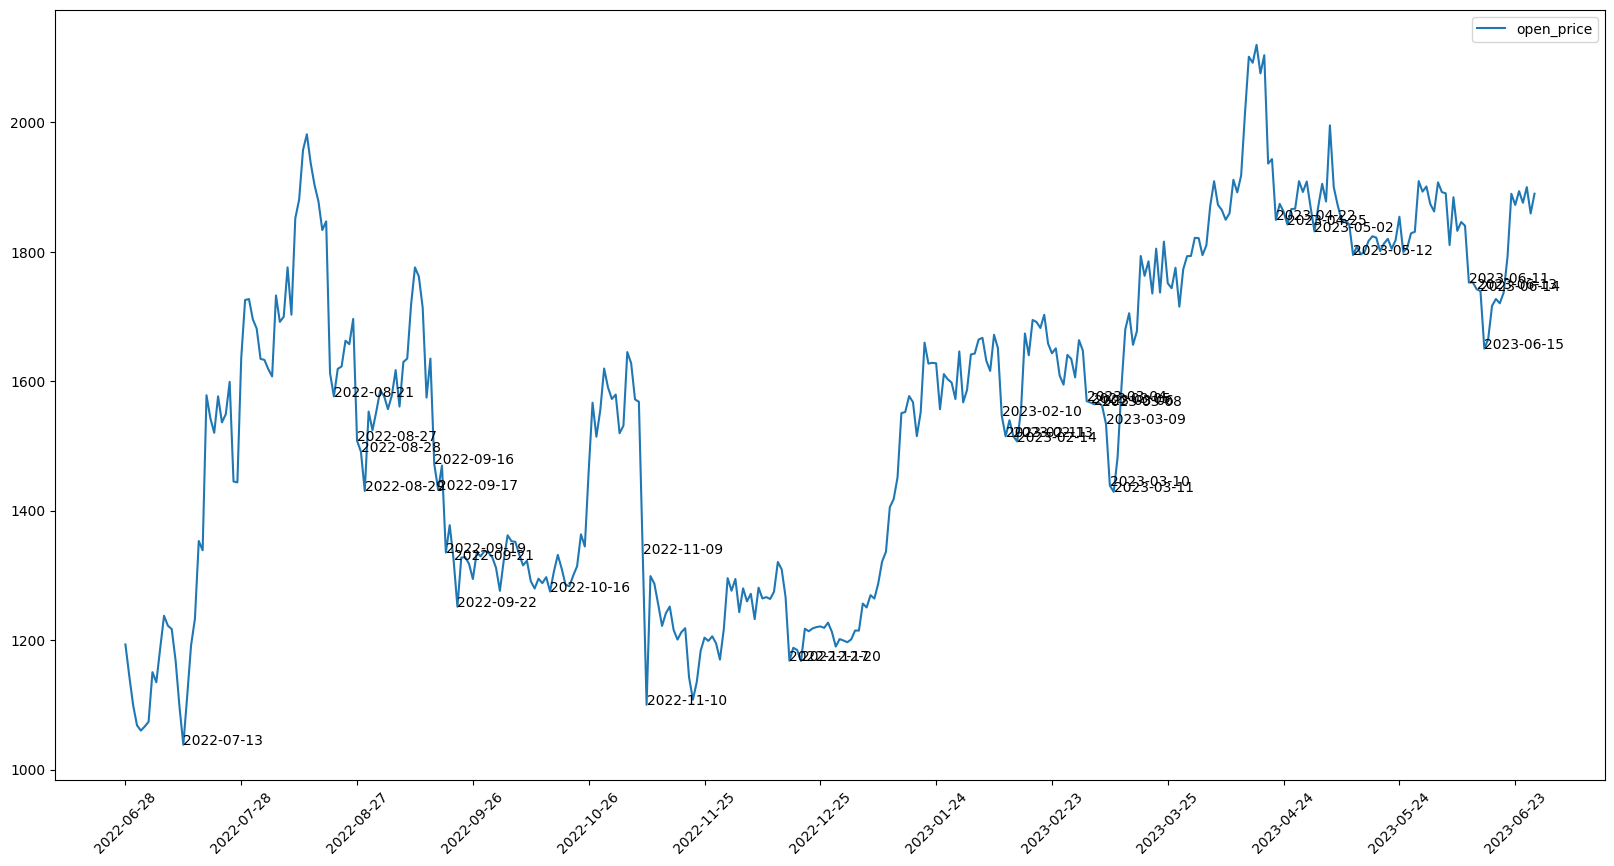

In [60]:
not_in_date_lower_list = get_in_period_lower(15)
lower_plt = get_annotate_plot(df, not_in_date_lower_list)
lower_plt.show()

In [49]:
def get_in_period_higher(period=PERIOD):
    period_not_in_list = get_in_period(period)
    period_in_lower_list = get_in_period_lower(period)
    period_in_higher_list = []
    for p in period_not_in_list:
        if p not in period_in_lower_list:
            period_in_higher_list.append(p)
    return period_in_higher_list


not_in_date_higher_list = get_in_period_higher(30)
print(not_in_date_higher_list)

datetime: 2022-07-28 period high: 1599.157227 period low: 1038.186646 price: 1636.231934 is_in: 0
datetime: 2022-07-29 period high: 1636.231934 period low: 1038.186646 price: 1725.623901 is_in: 0
datetime: 2022-07-30 period high: 1725.623901 period low: 1038.186646 price: 1727.06189 is_in: 0
datetime: 2022-07-31 period high: 1727.06189 period low: 1038.186646 price: 1695.884766 is_in: 1
datetime: 2022-08-01 period high: 1727.06189 period low: 1038.186646 price: 1681.445557 is_in: 1
datetime: 2022-08-02 period high: 1727.06189 period low: 1038.186646 price: 1634.645874 is_in: 1
datetime: 2022-08-03 period high: 1727.06189 period low: 1038.186646 price: 1633.05127 is_in: 1
datetime: 2022-08-04 period high: 1727.06189 period low: 1038.186646 price: 1618.886719 is_in: 1
datetime: 2022-08-05 period high: 1727.06189 period low: 1038.186646 price: 1607.523926 is_in: 1
datetime: 2022-08-06 period high: 1727.06189 period low: 1038.186646 price: 1732.661133 is_in: 0
datetime: 2022-08-07 period h

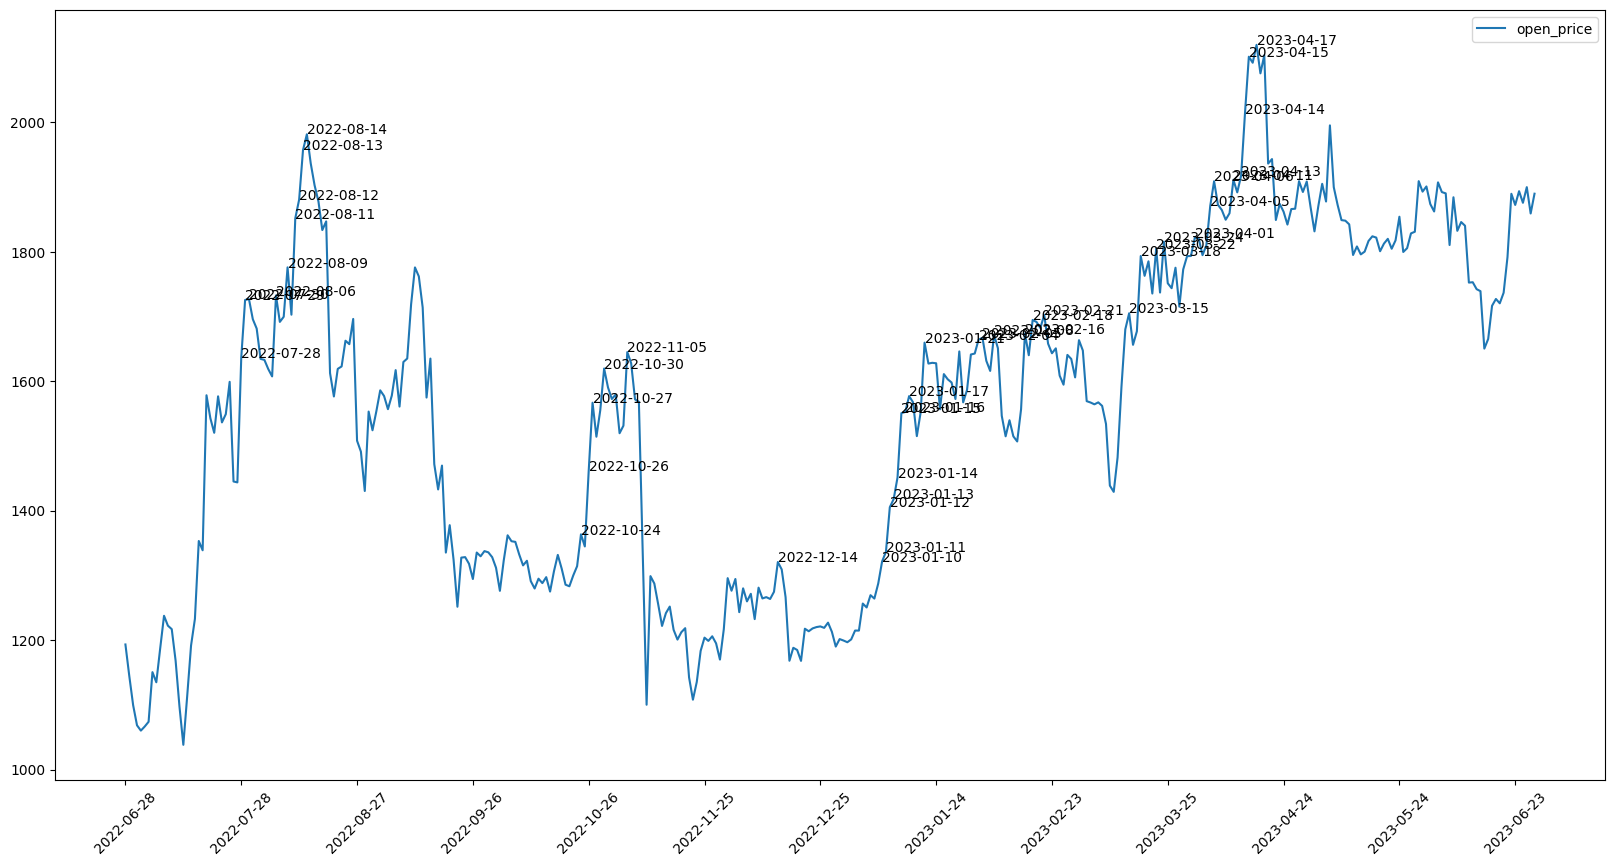

In [50]:
higher_plt = get_annotate_plot(df, not_in_date_higher_list)
higher_plt.show()

datetime: 2022-08-12 period high: 1851.828369 period low: 1038.186646 price: 1880.89917 is_in: 0
datetime: 2022-08-13 period high: 1880.89917 period low: 1038.186646 price: 1957.333984 is_in: 0
datetime: 2022-08-14 period high: 1957.333984 period low: 1038.186646 price: 1981.782471 is_in: 0
datetime: 2022-08-15 period high: 1981.782471 period low: 1038.186646 price: 1936.760498 is_in: 1
datetime: 2022-08-16 period high: 1981.782471 period low: 1038.186646 price: 1902.83313 is_in: 1
datetime: 2022-08-17 period high: 1981.782471 period low: 1038.186646 price: 1877.934326 is_in: 1
datetime: 2022-08-18 period high: 1981.782471 period low: 1038.186646 price: 1833.715576 is_in: 1
datetime: 2022-08-19 period high: 1981.782471 period low: 1038.186646 price: 1847.095337 is_in: 1
datetime: 2022-08-20 period high: 1981.782471 period low: 1038.186646 price: 1612.650635 is_in: 1
datetime: 2022-08-21 period high: 1981.782471 period low: 1038.186646 price: 1576.543579 is_in: 1
datetime: 2022-08-22 pe

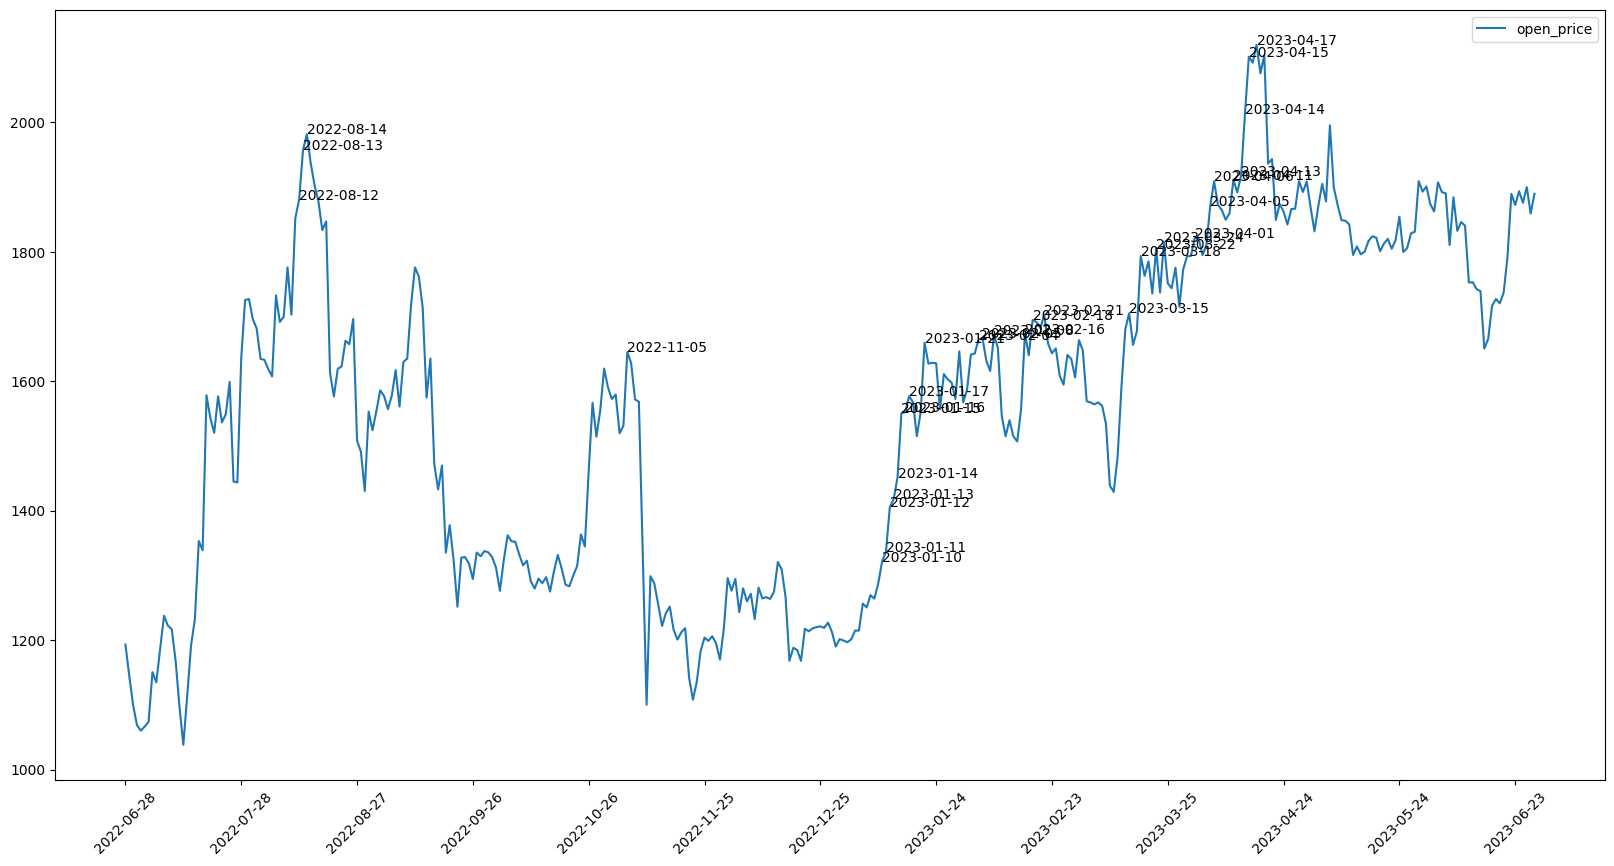

In [51]:
not_in_date_higher_list = get_in_period_higher(45)
higher_plt = get_annotate_plot(df, not_in_date_higher_list)
higher_plt.show()

In [ ]:
# 对比上涨下跌，过去 30 天的高点并不能作为一个清晰的买入卖出点，很多都是在一个迅速上升的半山腰，但是买入点的迹象比较明显，过去 30 天的低点买入就是一个比较好的方案，甚至可以是过去 15 天的低点
# 策略：
#   买入 —— 15 天低点买入 25%; 同时是 30 天低点的话再买入 25%；

from backtests.position import Position


TRADING_FEE = 0.0006


def lower_strategy(position):
    # current_usd = init_usd
    # current_eth = 0
    #
    # position = Position(current_eth, current_usd, TRADING_FEE)

    lower15_list = get_in_period_lower(15)
    lower30_list = get_in_period_lower(30)

    lower15_dict = dict()
    for d in lower15_list:
        lower15_dict[d[0]] = d[1]

    lower30_dict = dict()
    for d in lower30_list:
        lower30_dict[d[0]] = d[1]

    for d in eth_price_data[15:]:
        current_date = d["datetime"]
        price = d["price"]
        if current_date in lower15_dict:

